# Titanic - Machine Learning from Disaster



Desenvolvido por André Moreira 

- [Git](https://github.com/moreira-and)

- [Linkedin](https://www.linkedin.com/in/moreira-and/)



Competição de data science:



Will Cukierski. Titanic - Machine Learning from Disaster. https://kaggle.com/competitions/titanic, 2012. Kaggle.

## Bibliotecas Necessárias



Sempre que surgir a necessidade de utilizar uma nova biblioteca, o cientista de dados deve declarar ela no topo do arquivo.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import chi2_contingency

from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, RocCurveDisplay

## 1. Compreensão do Negócio (Business Understanding)

- **Objetivo de Negócio:** Definir o objetivo final do projeto com base nas necessidades do negócio (ex.: previsão, classificação, clusterização).

- **Situação Atual:** Entender o contexto e os fatores que motivam o projeto (ex.: por que essa análise é importante? Quais problemas ou oportunidades estão sendo abordados?).

- **Critérios de Sucesso:** Definir métricas ou resultados que caracterizam o sucesso do projeto (ex.: precisão mínima, aumento de eficiência, insights acionáveis).

O naufrágio do Titanic é um dos acidentes marítimos mais infames da história.



Em 15 de abril de 1912, durante sua viagem inaugural, o amplamente considerado "inafundável" RMS Titanic afundou após colidir com um iceberg. Infelizmente, não havia botes salva-vidas suficientes para todos a bordo, resultando na morte de 1502 das 2224 pessoas entre passageiros e tripulação.



Embora a sorte tenha desempenhado algum papel na sobrevivência, parece que alguns grupos de pessoas tinham mais chances de sobreviver do que outros.



Neste desafio, pedimos que você construa um modelo preditivo que responda à pergunta: “que tipos de pessoas tinham mais chances de sobreviver?” utilizando dados de passageiros (ou seja, nome, idade, gênero, classe socioeconômica, etc.).

## 2. Compreensão dos Dados (Data Understanding)

- [**Coleta de Dados:**](#coleta-de-dados) Identificar e adquirir os dados necessários para a análise (ex.: de sistemas internos, APIs, fontes públicas).

- [**Exploração Inicial:**](#exploração-inicial-eda---exploratory-data-analysis) Examinar as primeiras linhas do dataset, identificar os tipos de variáveis, verificar as estatísticas descritivas e entender a estrutura dos dados (`df.head()`, `df.info()`, `df.describe()`).

- [**Qualidade dos Dados:**](#qualidade-dos-dados) Avaliar a qualidade dos dados, identificando valores ausentes, inconsistências, e possíveis outliers (`df.isnull().sum()`, gráficos de boxplot, etc.).

- [**Análise Inicial:**](#análise-inicial) Realizar análises exploratórias básicas para verificar correlações, distribuições e padrões que possam existir nos dados.

### Coleta de dados



Aqui, o cientia de dados deve buscar fontes de informação. Seja com a área de negócio, buscando nos bancos de dados da empresa ou até dados públicos para enriquecer suas análises.

#### Leitura dos dados

In [2]:
# Este dataframe será utilizado para realizar a analise exploratória e treinar o modelo

df_train = pd.read_csv('/kaggle/input/titanic/train.csv')



# Este dataframe será utilizado para treinar o modelo de machine learning utilizado e verificar se o mesmo está atendendo os critérios do projeto. NÃO TREINE COM ESSES DADOS!

df_test_model = pd.read_csv('/kaggle/input/titanic/test.csv')



# Este dataframe será utilizado para gerar os dados que serão submetidos na competição.

df_test_sub = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')

##### Entendimento dos Dados  

| Variável  | Definição                                       | Chave                             |

|-----------|------------------------------------------------|-----------------------------------|

| survival  | Sobrevivência                                   | 0 = Não, 1 = Sim                  |

| pclass    | Classe do bilhete                              | 1 = 1ª, 2 = 2ª, 3 = 3ª           |

| sex       | Sexo                                           |                                   |

| Age       | Idade em anos                                  |                                   |

| sibsp     | Número de irmãos / cônjuges a bordo do Titanic |                                   |

| parch     | Número de pais / filhos a bordo do Titanic     |                                   |

| ticket    | Número do bilhete                              |                                   |

| fare      | Tarifa do passageiro                           |                                   |

| cabin     | Número da cabine                               |                                   |

| embarked  | Porto de Embarque                             | C = Cherbourg, Q = Queenstown, S = Southampton |



** Notas sobre as Variáveis:**

- **pclass**: Um proxy para o status socioeconômico (SES)  

  - 1ª = Alta  

  - 2ª = Média  

  - 3ª = Baixa  



- **age**: A idade é fracionária se for menor que 1. Se a idade for estimada, está na forma xx.5.



- **sibsp**: O conjunto de dados define relações familiares desta forma...  

  - Irmão = irmão, irmã, meio-irmão, meia-irmã  

  - Cônjuge = marido, esposa (amantes e noivos foram ignorados)  



- **parch**: O conjunto de dados define relações familiares desta forma...  

  - Pai = mãe, pai  

  - Filho = filha, filho, enteada, enteado  

  - Algumas crianças viajaram apenas com uma babá, portanto `parch=0` para elas.


### Exploração Inicial: (EDA - Exploratory Data Analysis)

In [3]:
# Verificar os tipos de dados

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- Oportunidade de Verificação dos Tipos de Dados:

    - **PassengerId**: Este campo representa a chave única de cada passageiro, permitindo a obtenção de informações adicionais relacionadas a eles. No entanto, como não é o foco do exercício, será separado para uso em dados de saída.

    - **Survived**: Trata-se de uma variável categórica/booleano, indicando a sobrevivência do passageiro. Será necessário adaptá-la para a análise, e ela será mantida como dado de saída.

    - **Pclass**: Esta variável categórica refere-se à classe do passageiro e precisa ser adaptada e analisada para entender seu impacto na sobrevivência.

    - **Name**: Embora possa parecer informativo, o nome não fornece causalidade relevante para a predição (ex.: "Os Matheus sobrevivem mais"). Portanto, deve ser excluído da análise.

    - **Sex**: Uma variável categórica que também requer adaptação e análise, uma vez que pode ter um impacto significativo nas chances de sobrevivência.

    - **Age**: Este é um dado numérico, e os valores nulos precisam ser tratados. Além disso, a análise da idade dos passageiros pode revelar insights importantes sobre a sobrevivência.

    - **SibSp**: Trata-se de um dado numérico que representa o número de irmãos e cônjuges a bordo. Este campo deve ser analisado para verificar sua relevância na predição.

    - **Parch**: Similar a SibSp, é um dado numérico que indica o número de pais e filhos a bordo. Deve ser analisado para compreender seu impacto na sobrevivência.

    - **Ticket**: Este campo é uma string e, à primeira vista, parece similar ao nome, não implicando causalidade direta. No entanto, pode haver padrões que ajudem a complementar dados faltantes em outras colunas.

    - **Fare**: Um dado numérico que representa o preço da passagem. É importante analisá-lo, pois pode ter correlações com a classe (Pclass) e, eventualmente, pode ser descartado pelo modelo se não contribuir para a predição.

    - **Cabin**: Uma variável categórica em formato de string que pode fornecer informações sobre a localização do passageiro no navio. Contudo, apresenta muitos dados nulos. Se não for possível preencher essas informações através de outras variáveis, como Ticket ou Embarked, devemos considerar sua exclusão.

    - **Embarked**: Esta variável categórica em string pode oferecer informações sobre os hábitos dos passageiros e como isso pode influenciar suas chances de sobrevivência. Assim como outras variáveis, os dados nulos precisam ser tratados, e uma análise deve ser realizada para compreender seu impacto.


In [4]:
# Verificar como os dados se organizam pegando 10 amostras aleatórias

df_train.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
765,766,1,1,"Hogeboom, Mrs. John C (Anna Andrews)",female,51.0,1,0,13502,77.9583,D11,S
18,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,345763,18.0000,NaN,S
457,458,1,1,"Kenyon, Mrs. Frederick R (Marion)",female,NaN,1,0,17464,51.8625,D21,S
615,616,1,2,"Herman, Miss. Alice",female,24.0,1,2,220845,65.0000,NaN,S
567,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
137,138,0,1,"Futrelle, Mr. Jacques Heath",male,37.0,1,0,113803,53.1000,C123,S
837,838,0,3,"Sirota, Mr. Maurice",male,NaN,0,0,392092,8.0500,NaN,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q
269,270,1,1,"Bissette, Miss. Amelia",female,35.0,0,0,PC 17760,135.6333,C99,S


### Qualidade dos Dados

In [5]:
# Verificar a quantidade de dados nulos

df_train.isna().sum()



#'''

#- Tratamentos Necessários

#    - **Age**: Esta variável apresenta uma quantidade considerável de dados nulos. É importante analisar sua distribuição para determinar a melhor abordagem, que pode incluir o uso da mediana, média ou, se necessário, a remoção das linhas que contêm esses valores ausentes.

#    - **Cabin**: Este campo possui uma quantidade significativa de dados nulos. Se não for possível preencher essas informações a partir de outras colunas, como Ticket ou Embarked, a exclusão desta coluna deve ser considerada.

#    - **Embarked**: Com poucos dados nulos, é necessário verificar qual tipo de informação pode ser inserida. A moda da coluna pode ser uma solução adequada para preencher os valores ausentes.

#'''

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Análise Inicial

#### Cabin agrega valor a análise?

In [6]:
# - Cabin can be composed of a ticket and Embarkation.

ticket_contingency_table = pd.crosstab(df_train['Pclass'],df_train['Cabin'])

ticket_contingency_table

Cabin,A10,A14,A16,A19,A20,A23,A24,A26,A31,A32,...,E8,F E69,F G63,F G73,F2,F33,F38,F4,G6,T
Pclass,,,,,,,,,,,,,,,,,,,,,
1,1,1,1,1,1,1,1,1,1,1,...,2,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,3,3,0,2,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,1,2,0,0,1,0,4,0


In [7]:
# If we separe the letter and number, this pass a context?

df_train[['Cabin_l','Cabin_n']] = df_train['Cabin'].str.extract(r'([A-Za-z]+)(\d+)')

df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_l,Cabin_n
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,85
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C,123
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN,NaN


In [8]:
# The cabin can be associated with a ticket and embarkation.

ticket_contingency_table = pd.crosstab(df_train['Pclass'], df_train['Cabin_l'])

ticket_contingency_table

# We only have Pclass 1 in this DataFrame, so it will be difficult to define other classes. However, could the ticket be useful?

Cabin_l,A,B,C,D,E,F,G
Pclass,,,,,,,
1,15,47,59,29,25,0,0
2,0,0,0,1,4,8,0
3,0,0,0,0,4,1,7


In [9]:
ticket_contingency_table = pd.crosstab(df_train['Ticket'], df_train['Cabin_l'])

ticket_contingency_table

# Ticket is not useful for this modeling, and we can't use it to complement Cabin.

Cabin_l,A,B,C,D,E,F,G
Ticket,,,,,,,
110152,0,3,0,0,0,0,0
110413,0,0,0,0,3,0,0
110465,1,0,1,0,0,0,0
110564,0,0,1,0,0,0,0
110813,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...
PP 9549,0,0,0,0,0,0,2
S.O./P.P. 3,0,0,0,0,1,0,0
SOTON/O.Q. 392078,0,0,0,0,1,0,0


In [10]:
# Is there a relationship between Cabin and Survived?

contingency_table = pd.crosstab(df_train['Survived'], df_train['Cabin_l'])

contingency_table

# Looking at the data, we see Cabins A, B, C, D, E, and G, but we don't have enough data to know if this is real.

# Additionally, we only have this data for the first class passengers. We will make a decision to remove this data from the training DataFrame.

Cabin_l,A,B,C,D,E,F,G
Survived,,,,,,,
0,8,12,24,7,8,2,5
1,7,35,35,23,25,7,2


Não foram encontrados padrões no primeiro momento, portanto, a coluna Cabin será excluída da análise.

#### Análise dos dados categóricos

In [11]:
def plot_categorical_relationship(df, cat_var1, cat_var2, hue=None):

    """

    Plota barplots para duas variáveis categóricas, com a segunda variável categórica representada em colunas.

    

    Parameters:

        df (pd.DataFrame): O dataframe contendo as variáveis.

        cat_var1 (str): Nome da primeira variável categórica.

        cat_var2 (str): Nome da segunda variável categórica.

        hue (str, optional): Nome da variável a ser usada para colorir as barras. Padrão é None.

    """

    

    # Verifica se as variáveis estão no DataFrame

    if cat_var1 not in df.columns or cat_var2 not in df.columns:

        raise ValueError(f"As variáveis {cat_var1} ou {cat_var2} não estão no DataFrame.")



    # Cria o gráfico usando catplot

    plt.figure(figsize=(12, 6))

    sns.catplot(

        data=df, 

        x=cat_var1, 

        kind='count', 

        col=cat_var2,

        hue=hue,  # Adiciona hue como opcional

        height=4, 

        aspect=0.7

    )

    

    plt.subplots_adjust(top=0.8)

    plt.suptitle(f'Relação entre {cat_var1} e {cat_var2}', fontsize=16)

    

    plt.show()

In [12]:
col = ['Sex','Pclass','Embarked']

<Figure size 1200x600 with 0 Axes>

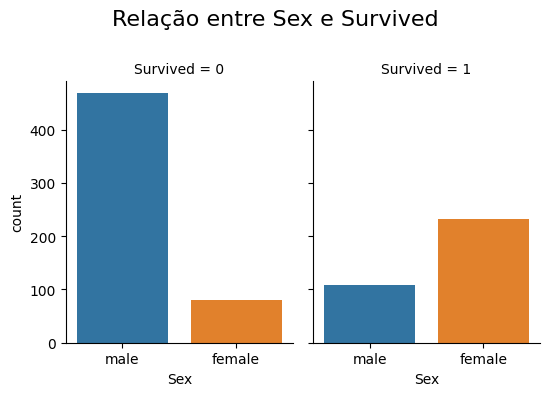

<Figure size 1200x600 with 0 Axes>

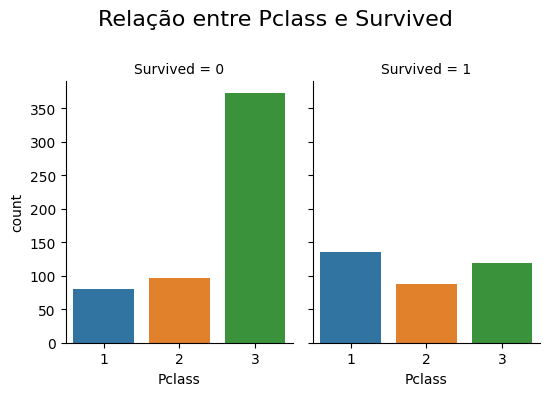

<Figure size 1200x600 with 0 Axes>

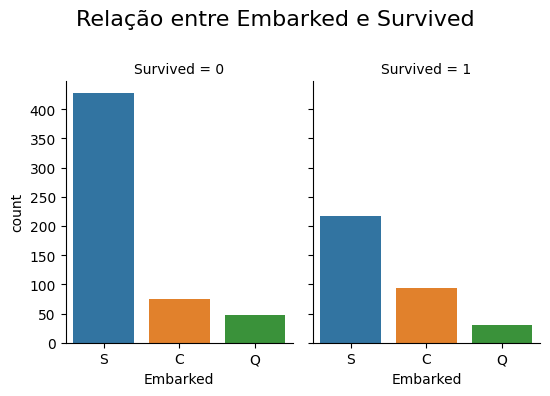

In [13]:
for var in col:

    plot_categorical_relationship(df=df_train,cat_var1=var,cat_var2='Survived')

Ao analisar os dados de sobrevivência em relação às variáveis categóricas, é possível obter alguns insights:

- **Classe Social**: A classe social influencia significativamente na sobrevivência. A primeira classe tem a maior probabilidade de sobrevivência, seguida da segunda e terceira.

- **Sexo**: O sexo também influencia significativamente na sobrevivência. O sexo feminino tem maior probabilidade de sobrevivência que o sexo masculino.

- **Local de Embarcação**: O local de embarcação aparenta uma ligeira diferença em relação à sobrevivência, sendo o embarque em Cherbourg o local com maior probabilidade de sobrevivência. No entanto, existem dúvidas em relação à causalidade. Seria interessante estudar melhor esta variável e validar se influencia a sobrevivência através do teste qui-quadrado.


<Figure size 1200x600 with 0 Axes>

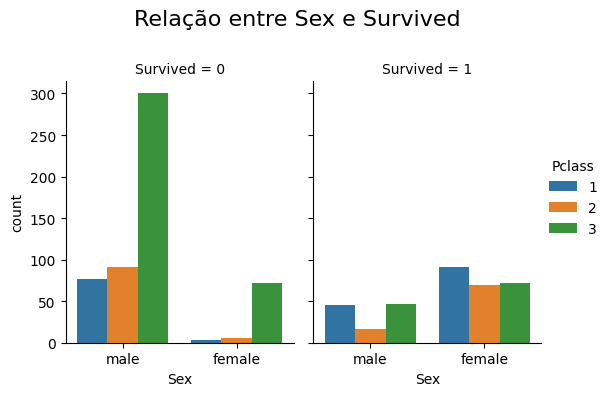

In [14]:
# Será que a classe influencia na sobrevivência de acordo com o sexo?

plot_categorical_relationship(df=df_train,cat_var1='Sex',cat_var2='Survived',hue='Pclass')

Além do gênero, observou-se que a classe social também desempenha um papel significativo na probabilidade de sobrevivência. Passageiros das primeiras e segundas classes apresentam maiores chances de sobrevivência em comparação aos da terceira classe. Entre aqueles que sobreviveram, os homens têm uma probabilidade de sobrevivência inferior à das mulheres, mas ainda assim superior à dos passageiros do sexo masculino da terceira classe.

#### Teste do Qui-Quadrado



O teste do Qui-Quadrado é uma ferramenta valiosa para analisar a relação entre variáveis categóricas e a variável alvo. 



Basicamente, a hipótese nula estabelece que as variáveis são estatisticamente independentes e não influenciam a variável alvo. Para testar essa hipótese, utiliza-se o valor de p (p-value). 



Se o p-value for menor que 0.05, podemos rejeitar a hipótese nula, indicando que há uma relação significativa entre a variável em questão e a variável alvo.

In [15]:
def chi_squared_test(df, target_variable):

    """

    Realiza o teste do Qui-Quadrado para variáveis categóricas em relação à variável alvo.

    

    Parameters:

        df (pd.DataFrame): DataFrame contendo as variáveis categóricas e a variável alvo.

        target_variable (str): Nome da coluna da variável alvo categórica.

        

    Returns:

        pd.Series: P-valores para cada variável independente em relação à variável alvo.

    """

    # Cria uma cópia do DataFrame para evitar alterações no original

    df_transform = df.copy()

    

    # Inicializa o LabelEncoder

    labelencoder = LabelEncoder()

    

    # Loop por todas as colunas no DataFrame e aplica o LabelEncoder

    for col in df_transform.columns:

        df_transform[col] = labelencoder.fit_transform(df_transform[col])

    

    # Realiza o teste do Qui-Quadrado

    chi2_values, p_values = chi2(df_transform.drop(columns=[target_variable]), df_transform[target_variable])

    

    # Cria um DataFrame com os p-valores

    p_values_df = pd.Series(p_values, index=df_transform.drop(columns=[target_variable]).columns)

    

    return p_values_df


In [16]:
p_values = chi_squared_test(df_train[col+['Survived']], 'Survived')

print(p_values)

Sex         6.077838e-22
Pclass      1.581715e-13
Embarked    1.787913e-03
dtype: float64


Com base na análise gráfica e na validação por meio do teste do Qui-Quadrado, concluímos que as variáveis ['Pclass', 'Sex', 'Embarked'] têm influência na sobrevivência e, portanto, serão incluídas na modelagem do problema.

#### Análise dos dados numéricos

##### Distribuição

In [17]:
def count_outliers(df, column):

    """

    Conta o número de outliers em uma coluna utilizando o método IQR (Intervalo Interquartil).

    

    Parameters:

        df (pd.DataFrame): DataFrame contendo os dados.

        column (str): Nome da coluna para a qual contar os outliers.

        

    Returns:

        int: Número de outliers encontrados.

    """

    Q1 = df[column].quantile(0.25)

    Q3 = df[column].quantile(0.75)

    IQR = Q3 - Q1

    

    lower_bound = Q1 - 1.5 * IQR

    upper_bound = Q3 + 1.5 * IQR

    

    return ((df[column] < lower_bound) | (df[column] > upper_bound)).sum()



def plot_boxplots_with_outliers(df, columns):

    """

    Plota boxplots para as colunas especificadas e exibe a contagem de outliers em cada gráfico.

    

    Parameters:

        df (pd.DataFrame): DataFrame contendo os dados.

        columns (list): Lista de colunas para plotar.

    """

    # Cria subplots para os boxplots

    fig, axes = plt.subplots(1, len(columns), figsize=(15, 5))



    # Loop pelas colunas e cria boxplots

    for ax, column in zip(axes, columns):

        sns.boxplot(data=df, x=column, ax=ax)

        outlier_count = count_outliers(df, column)

        ax.set_title(f'{column} (Outliers: {outlier_count})')



    plt.tight_layout()

    plt.show()


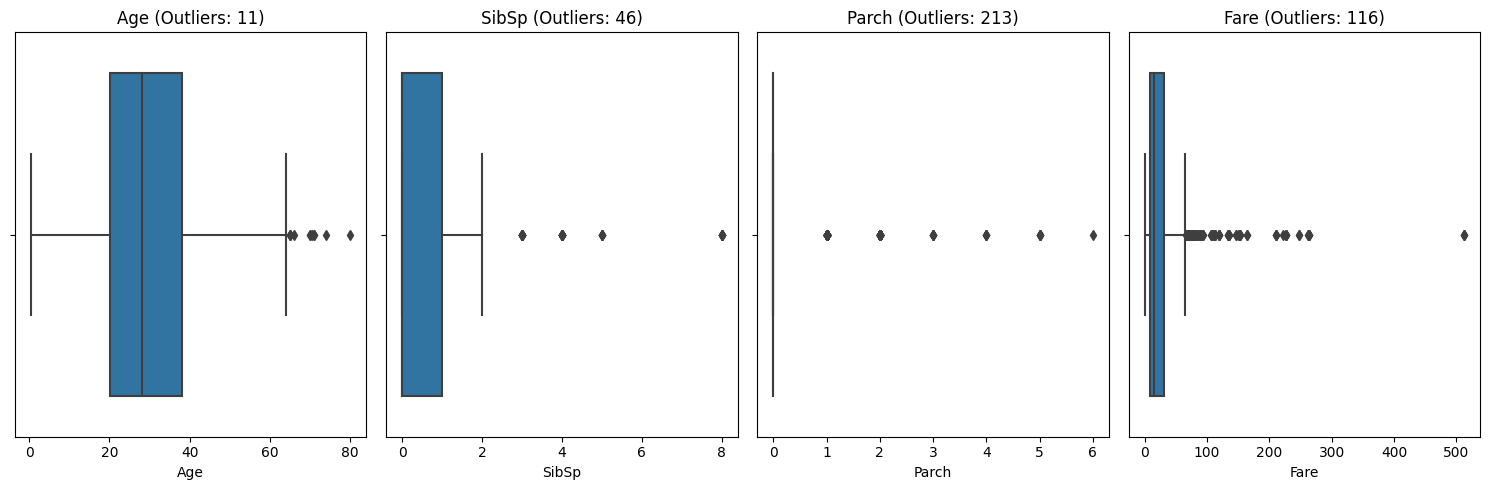

In [18]:
columns_to_analyze = ['Age', 'SibSp', 'Parch', 'Fare']

plot_boxplots_with_outliers(df_train, columns_to_analyze)

In [19]:
def count_outliers(df, column):

    """

    Conta o número de outliers em uma coluna utilizando o método IQR (Intervalo Interquartil).

    

    Parameters:

        df (pd.DataFrame): DataFrame contendo os dados.

        column (str): Nome da coluna para a qual contar os outliers.

        

    Returns:

        tuple: (número de outliers, limite inferior, limite superior)

    """

    Q1 = df[column].quantile(0.25)

    Q3 = df[column].quantile(0.75)

    IQR = Q3 - Q1

    

    lower_bound = Q1 - 1.5 * IQR

    upper_bound = Q3 + 1.5 * IQR

    

    outlier_count = ((df[column] < lower_bound) | (df[column] > upper_bound)).sum()

    

    return outlier_count, lower_bound, upper_bound




In [20]:
def plot_boxplots_hist_kde(df, columns):

    """

    Plota boxplots, histogramas e gráficos de densidade (KDE) para as colunas especificadas,

    exibindo a contagem de outliers em cada gráfico.

    

    Parameters:

        df (pd.DataFrame): DataFrame contendo os dados.

        columns (list): Lista de colunas para plotar.

    """

    # Cria subplots para os boxplots e histogramas

    fig, axes = plt.subplots(len(columns), 2, figsize=(12, 5 * len(columns)))



    # Loop pelas colunas e cria boxplots e histogramas

    for i, column in enumerate(columns):

        # Boxplot

        sns.boxplot(data=df, x=column, ax=axes[i, 0])

        outlier_count, lower_bound, upper_bound = count_outliers(df, column)

        axes[i, 0].set_title(f'{column} (Outliers: {outlier_count})')



        # Histograma e KDE

        sns.histplot(data=df, x=column, kde=True, ax=axes[i, 1], bins=30)



        # Adiciona linhas para limites de outliers no histograma

        axes[i, 1].axvline(lower_bound, color='red', linestyle='dashed', linewidth=1.5, label='Limite Inferior')

        axes[i, 1].axvline(upper_bound, color='green', linestyle='dashed', linewidth=1.5, label='Limite Superior')

        

        axes[i, 1].set_title(f'{column} - Histograma e KDE')

        axes[i, 1].legend()



        # Adiciona anotações para os limites no histograma

        axes[i, 1].text(lower_bound, axes[i, 1].get_ylim()[1] * 0.9, 'Limite Inferior', color='red')

        axes[i, 1].text(upper_bound, axes[i, 1].get_ylim()[1] * 0.9, 'Limite Superior', color='green')



    plt.tight_layout()

    plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

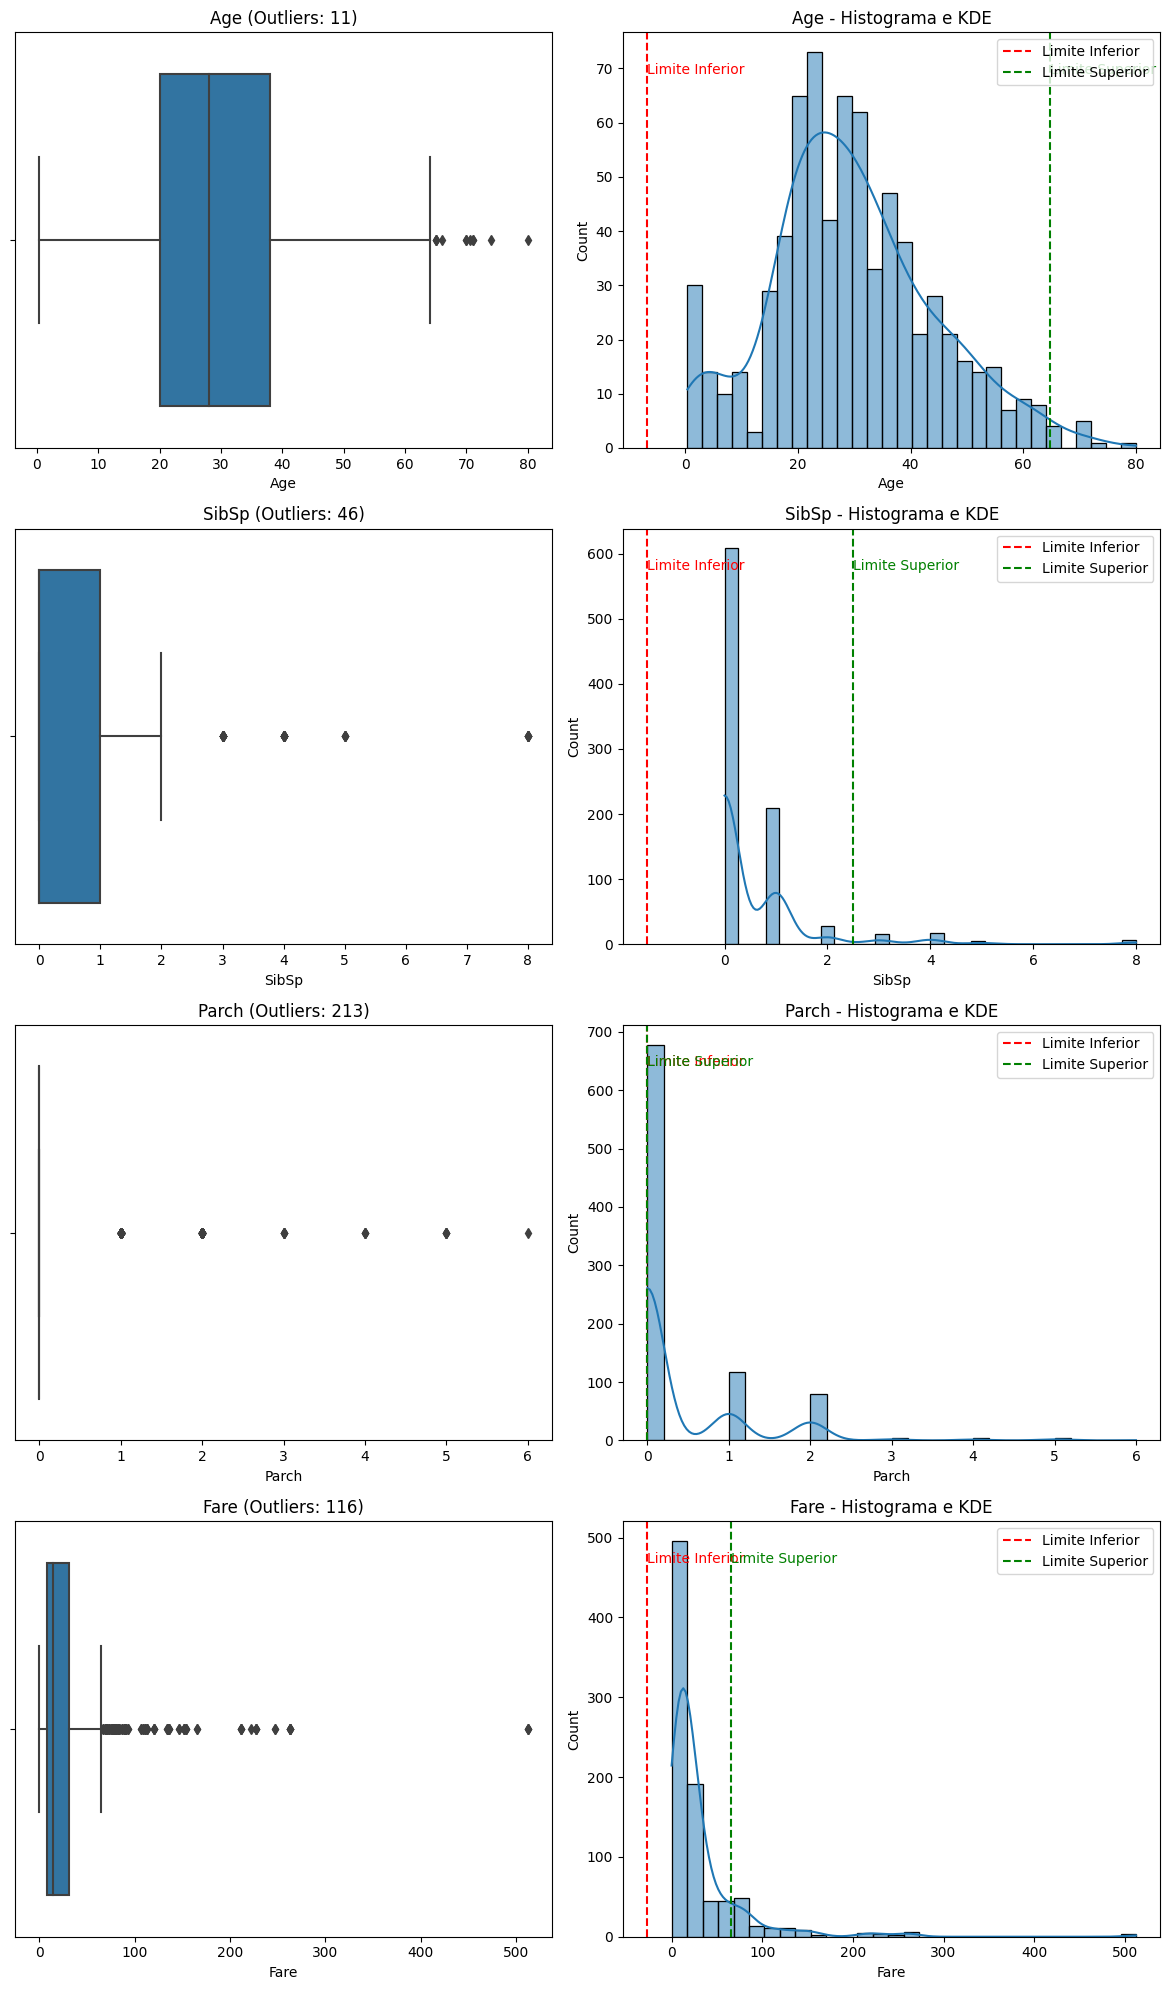

In [21]:
columns_to_analyze = ['Age', 'SibSp', 'Parch', 'Fare']

plot_boxplots_hist_kde(df_train, columns_to_analyze)

Análise dos Dados



- **Parch**: 

  - Indica que pode ser simplificado em uma variável categórica.

  - Exemplos de categorias: 

    - Com filhos 

    - Com um filho 

    - Sem filhos



- **Fare**: 

  - A maioria dos valores está concentrada em valores baixos.

  - Pode representar a classe do passageiro.

  - É necessário estudar como `Fare` se relaciona com as variáveis `Pclass` e `Survived`.



- **SibSp**: 

  - Há uma concentração significativa de valores em `0`.

  - Pode ser transformado em uma variável categórica.

  - Exemplos de categorias:

    - Sozinho

    - Família pequena

    - Família grande



- **Age**: 

  - Apresenta variações que podem permitir a categorização.

  - Sugestões de categorias:

    - Criança

    - Adolescente

    - Adulto

    - Idoso


##### Correlação

In [22]:
def plot_correlation_heatmap(df):

    """

    Plota um mapa de calor da correlação entre variáveis numéricas no DataFrame.

    

    Parameters:

        df (pd.DataFrame): DataFrame contendo os dados.

    """

    # Calcula a correlação entre as variáveis numéricas

    correlation_matrix = df.select_dtypes(include=['number']).corr()



    # Cria o mapa de calor

    plt.figure(figsize=(10, 8))

    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar_kws={"shrink": .8})

    plt.title('Correlação entre Variáveis Numéricas')

    plt.show()

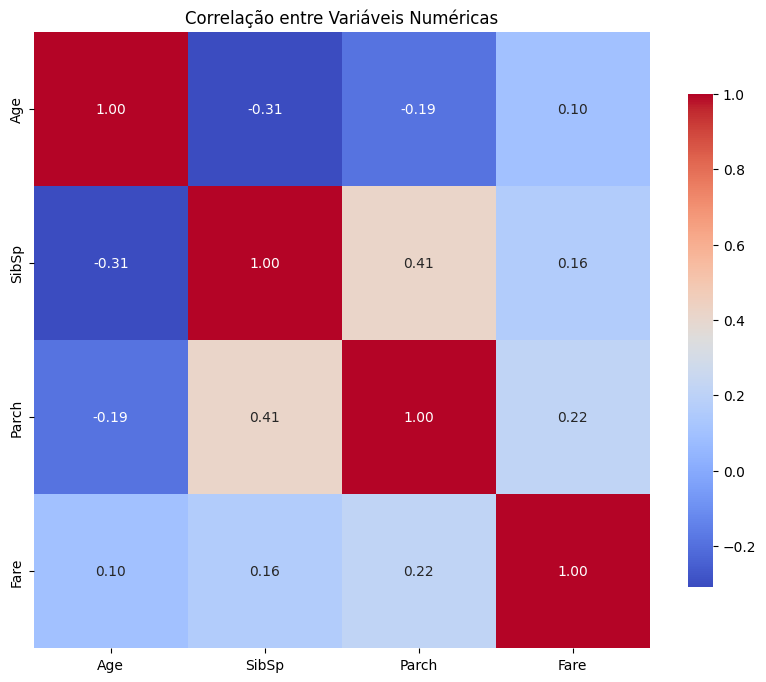

In [23]:
plot_correlation_heatmap(df_train[['Age', 'SibSp', 'Parch','Fare']])


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

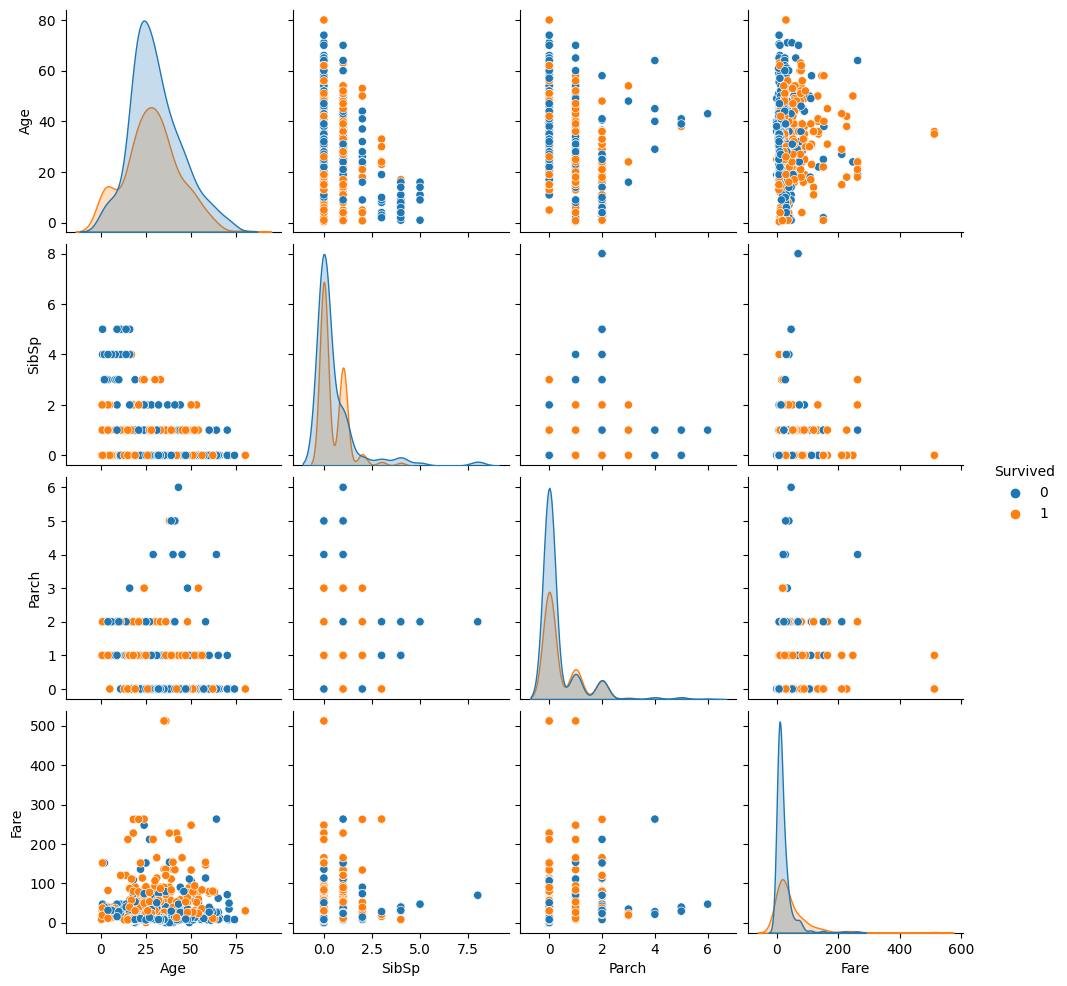

In [24]:
sns.pairplot(df_train[['Age', 'SibSp', 'Parch', 'Fare', 'Survived']], hue='Survived')

In [25]:
def correlation_analysis(df, var1, var2, alpha=0.05):

    """

    Calcula os coeficientes de correlação de Pearson e Spearman entre duas variáveis numéricas

    e interpreta os resultados com base no nível de significância.



    Parameters:

        df (pd.DataFrame): O DataFrame que contém os dados.

        var1 (str): Nome da primeira variável numérica.

        var2 (str): Nome da segunda variável numérica.

        alpha (float, opcional): Nível de significância para os testes. Padrão é 0.05.



    Returns:

        dict: Um dicionário contendo os coeficientes de correlação, p-valores e a interpretação.

    """

    results = {}



    # Coeficiente de Correlação de Pearson

    pearson_corr, pearson_p_value = stats.pearsonr(df[var1], df[var2])

    results['Pearson Correlation'] = pearson_corr

    results['Pearson P-value'] = pearson_p_value



    if pearson_p_value < alpha:

        results['Pearson Test'] = "Rejeita a hipótese nula: as variáveis não são independentes."

    else:

        results['Pearson Test'] = "Não se rejeita a hipótese nula: as variáveis são independentes."



    # Coeficiente de Correlação de Spearman

    spearman_corr, spearman_p_value = stats.spearmanr(df[var1], df[var2])

    results['Spearman Correlation'] = spearman_corr

    results['Spearman P-value'] = spearman_p_value



    if spearman_p_value < alpha:

        results['Spearman Test'] = "Rejeita a hipótese nula: as variáveis não são independentes."

    else:

        results['Spearman Test'] = "Não se rejeita a hipótese nula: as variáveis são independentes."



    return results

In [26]:
results = correlation_analysis(df_train, 'SibSp', 'Parch')



for key, value in results.items():

    print(f"{key}: {value}")

Pearson Correlation: 0.4148376986201561
Pearson P-value: 2.2418236681407813e-38
Pearson Test: Rejeita a hipótese nula: as variáveis não são independentes.
Spearman Correlation: 0.4500139710086164
Spearman P-value: 1.226001634071391e-45
Spearman Test: Rejeita a hipótese nula: as variáveis não são independentes.


In [27]:
results = correlation_analysis(df_train[df_train['Age'].notna()], 'SibSp', 'Age')



for key, value in results.items():

    print(f"{key}: {value}")

Pearson Correlation: -0.3082467589236567
Pearson P-value: 3.509025193784254e-17
Pearson Test: Rejeita a hipótese nula: as variáveis não são independentes.
Spearman Correlation: -0.1820612589179174
Spearman P-value: 9.717194149362118e-07
Spearman Test: Rejeita a hipótese nula: as variáveis não são independentes.


In [28]:
results = correlation_analysis(df_train[df_train['Age'].notna()], 'Parch', 'Age')



for key, value in results.items():

    print(f"{key}: {value}")

Pearson Correlation: -0.18911926263203496
Pearson P-value: 3.5699493882886996e-07
Pearson Test: Rejeita a hipótese nula: as variáveis não são independentes.
Spearman Correlation: -0.25421211743018024
Spearman P-value: 5.408556597051214e-12
Spearman Test: Rejeita a hipótese nula: as variáveis não são independentes.


As variáveis ['Age','SibSp','Parch'] apresentam dependência.

### Associação

In [29]:
# Saber se o Fare deve ser representado por Pclass e vice-versa. Ignorar Fare?

## 3. Preparação dos Dados (Data Preparation)

- **Seleção de Dados:** Escolher as colunas ou features que são relevantes para o problema, descartando as que não contribuem.

- **Limpeza de Dados:** Tratar valores ausentes, duplicados, ou inconsistentes de maneira adequada (ex.: preenchimento, exclusão ou imputação).

- **Transformação de Dados:** Realizar transformações nos dados, como codificação de variáveis categóricas (One-Hot Encoding), normalização ou padronização de variáveis numéricas.

- **Criação de Novas Features (Feature Engineering):** Criar novas variáveis ou transformar variáveis existentes para melhor representar o problema (ex.: combinação de variáveis, transformação de colunas temporais, categorias de idade).

### Seleção de Dados

In [30]:
# - Name, PassengerId, Ticket and Cabin aren't important for causal effects and can be removed.

# Drop the columns from the DataFrame

df_train.drop(columns=['Name','Ticket','Cabin_l','Cabin_n','Cabin'], inplace=True)

### Limpeza de Dados

Os outliers não serão removidos

In [31]:
# A moda é um valor representativo relacionado ao local de embarque. Como há apenas alguns dados ausentes, vamos preencher os valores nulos com a moda.



moda_embarked = df_train['Embarked'].mode()[0]

print(f'Moda: {moda_embarked}\n')

# Preencher os valores nulos com a moda

df_train['Embarked'] = df_train['Embarked'].fillna(moda_embarked)

df_train['Embarked'].isna().sum()

Moda: S



0

In [32]:
# A mediana em relação a idade, pode ser representativo



mediana_idade = df_train['Age'].mean()

print(f'Mediana: {mediana_idade}\n')



# Preencher os valores nulos com a mediana

df_train['Age'] = df_train['Age'].fillna(mediana_idade)

df_train['Age'].isna().sum()

Mediana: 29.69911764705882



0

In [33]:
def show_mode_and_median(df: pd.DataFrame):

    """

    Mostra a moda e a mediana de todas as colunas em um DataFrame.

    

    Parâmetros:

        df (pd.DataFrame): DataFrame contendo os dados.

        

    Retorna:

        None: Exibe os resultados no console.

    """

    print("Resumo de Moda e Mediana por Coluna:\n")

    

    for column in df.columns:

        print(f"Coluna: {column}")

        

        # Moda

        mode = df[column].mode()

        if not mode.empty:

            print(f"  Moda: {', '.join(map(str, mode.tolist()))}")

        else:

            print("  Moda: Nenhuma (coluna vazia)")

        

        # Mediana (somente para colunas numéricas)

        if pd.api.types.is_numeric_dtype(df[column]):

            median = df[column].median()

            print(f"  Mediana: {median}")

        else:

            print("  Mediana: Não aplicável para colunas não numéricas")

        

        print("-" * 40)

In [34]:
show_mode_and_median(df_train)

Resumo de Moda e Mediana por Coluna:

Coluna: PassengerId
  Moda: 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 20

In [35]:
# Remoção de dados duplicados para balancear o modelo

df_train.drop_duplicates(inplace=True)

### Transformação de Dados

In [36]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [37]:
# Variaveis de entrada

df_train['Pclass'] = df_train['Pclass'].astype('category')

df_train['Embarked'] = df_train['Embarked'].astype('category')

df_train['Sex'] = df_train['Sex'].astype('category')

df_train['Age'] = df_train['Age'].astype(int)

df_train['SibSp'] = df_train['SibSp'].astype(int)

df_train['Parch'] = df_train['Parch'].astype(int)

df_train['Fare'] = df_train['Fare'].astype(float)

In [38]:
# Variaveis de saída

df_train['PassengerId'] = df_train['PassengerId'].astype(str)

df_train['Survived'] = df_train['Survived'].astype('category')

### Feature Engineering

#### Transformando Idade em Categorias



- **Age**: 

  - Apresenta variações que podem permitir a categorização.

  - Sugestões de categorias:

    - Criança

    - Adolescente

    - Adulto

    - Meia idade

    - Idoso

In [39]:
# Definindo os bins e as labels

bins = [-1, 12, 19, 39, 64, float('inf')]

labels = ['Criança', 'Adolescente', 'Adulto Jovem', 'Adulto Meia Idade', 'Idoso']



# Categorizar a coluna 'Age'

df_train['Age Group'] = pd.cut(df_train['Age'], bins=bins, labels=labels)

df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age Group
0,1,0,3,male,22,1,0,7.2500,S,Adulto Jovem
1,2,1,1,female,38,1,0,71.2833,C,Adulto Jovem
2,3,1,3,female,26,0,0,7.9250,S,Adulto Jovem
3,4,1,1,female,35,1,0,53.1000,S,Adulto Jovem
4,5,0,3,male,35,0,0,8.0500,S,Adulto Jovem


#### Transformando SibSp em categorias





- **SibSp**: 

  - Há uma concentração significativa de valores em `0`.

  - Pode ser transformado em uma variável categórica.

  - Exemplos de categorias:

    - Sozinho

    - Família pequena

    - Família grande

In [40]:
# Definindo os bins e as labels

bins = [-1, 0, 2, float('inf')]

labels = ['Sozinho', 'Família pequena', 'Família grande']



# Categorizar a coluna 'Age'

df_train['SibSp Group'] = pd.cut(df_train['SibSp'], bins=bins, labels=labels)

df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age Group,SibSp Group
0,1,0,3,male,22,1,0,7.2500,S,Adulto Jovem,Família pequena
1,2,1,1,female,38,1,0,71.2833,C,Adulto Jovem,Família pequena
2,3,1,3,female,26,0,0,7.9250,S,Adulto Jovem,Sozinho
3,4,1,1,female,35,1,0,53.1000,S,Adulto Jovem,Família pequena
4,5,0,3,male,35,0,0,8.0500,S,Adulto Jovem,Sozinho


#### Transformando Parch em categorias





- **Parch**: 

  - Indica que pode ser simplificado em uma variável categórica.

  - Exemplos de categorias: 

    - Com filhos 

    - Com um filho 

    - Sem filhos

In [41]:
# Definindo os bins e as labels

bins = [-1, 0, 1, float('inf')]

labels = ['Sem filhos', 'Com um filho', 'Com filhos']



# Categorizar a coluna 'Age'

df_train['Parch Group'] = pd.cut(df_train['Parch'], bins=bins, labels=labels)

df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age Group,SibSp Group,Parch Group
0,1,0,3,male,22,1,0,7.2500,S,Adulto Jovem,Família pequena,Sem filhos
1,2,1,1,female,38,1,0,71.2833,C,Adulto Jovem,Família pequena,Sem filhos
2,3,1,3,female,26,0,0,7.9250,S,Adulto Jovem,Sozinho,Sem filhos
3,4,1,1,female,35,1,0,53.1000,S,Adulto Jovem,Família pequena,Sem filhos
4,5,0,3,male,35,0,0,8.0500,S,Adulto Jovem,Sozinho,Sem filhos


In [42]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    object  
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Sex          891 non-null    category
 4   Age          891 non-null    int64   
 5   SibSp        891 non-null    int64   
 6   Parch        891 non-null    int64   
 7   Fare         891 non-null    float64 
 8   Embarked     891 non-null    category
 9   Age Group    891 non-null    category
 10  SibSp Group  891 non-null    category
 11  Parch Group  891 non-null    category
dtypes: category(7), float64(1), int64(3), object(1)
memory usage: 42.0+ KB


In [43]:
# Aplicar LabelEncoder em cada coluna categórica

categorical_columns = df_train.select_dtypes(include=['category']).columns.tolist()

categorical_columns

['Survived',
 'Pclass',
 'Sex',
 'Embarked',
 'Age Group',
 'SibSp Group',
 'Parch Group']

In [44]:
# Inicializar o LabelEncoder

label_encoder = LabelEncoder()



for column in categorical_columns:

    df_train[column] = label_encoder.fit_transform(df_train[column].astype(str))

## 4. Modelagem (Modeling)

- **Seleção de Algoritmo:** Escolher algoritmos de machine learning ou técnicas analíticas adequadas ao problema (ex.: regressão, classificação, árvore de decisão, redes neurais, clusterização).

- **Divisão dos Dados:** Separar o dataset em conjuntos de treino e teste para evitar overfitting e validar o modelo (`train_test_split`).

- **Treinamento do Modelo:** Treinar o modelo escolhido com os dados de treino (`model.fit()`).

- **Ajuste de Hiperparâmetros (se aplicável):** Ajustar parâmetros do modelo para melhorar o desempenho e a precisão, utilizando técnicas como busca em grade (Grid Search) ou otimização bayesiana.

- **Validação Cruzada (se aplicável):** Utilizar técnicas de validação cruzada para verificar a generalização do modelo em diferentes divisões do dataset.



### Avaliação (Evaluation)

- **Predições:** Fazer previsões com o modelo treinado usando os dados de teste (`model.predict()`).

- **Métricas de Desempenho:** Avaliar o modelo com métricas apropriadas ao problema (ex.: acurácia, precisão, recall, F1-score, ROC-AUC para classificação; erro médio quadrático, R² para regressão).

- **Análise das Métricas:** Analisar os resultados das métricas para determinar se o modelo atende aos requisitos de negócio. Verificar trade-offs, como precisão vs. recall, se aplicável.

- **Importância das Variáveis (se aplicável):** Identificar as variáveis que mais influenciam o modelo (ex.: `model.feature_importances_` para modelos baseados em árvores).

Accuracy: 0.83
Confusion Matrix:
[[97  8]
 [22 52]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.92      0.87       105
           1       0.87      0.70      0.78        74

    accuracy                           0.83       179
   macro avg       0.84      0.81      0.82       179
weighted avg       0.84      0.83      0.83       179

ROC AUC Score: 0.85


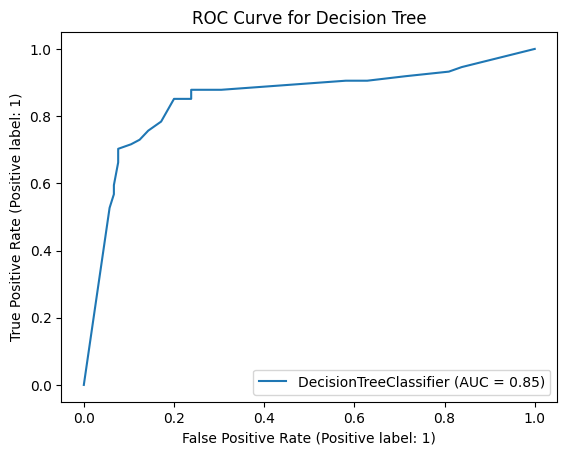

In [45]:
# selecionar as colunas relevantes

X = df_train[['Pclass', 'Sex', 'Embarked', 'Age Group', 'SibSp Group', 'Parch Group']]  # Características (features)

y = df_train['Survived']  # Rótulo (target)



# Dividir os dados em conjuntos de treino e teste

X_train_tree, X_test_tree, y_train_tree, y_test_tree = train_test_split(X, y, test_size=0.2, random_state=42)



# Criar o modelo de Decision Tree

model_tree = DecisionTreeClassifier(random_state=42)



# Treinar o modelo

model_tree.fit(X_train_tree, y_train_tree)



# Fazer previsões

y_pred_tree = model_tree.predict(X_test_tree)





# Calcular as métricas



# Acurácia

accuracy = accuracy_score(y_test_tree, y_pred_tree)



# Matriz de Confusão

conf_matrix = confusion_matrix(y_test_tree, y_pred_tree)



# Relatório de Classificação

class_report = classification_report(y_test_tree, y_pred_tree)



# ROC AUC (se aplicável para o seu modelo binário)

roc_auc = roc_auc_score(y_test_tree, model_tree.predict_proba(X_test_tree)[:, 1])



# Exibir as métricas

print(f"Accuracy: {accuracy:.2f}")

print("Confusion Matrix:")

print(conf_matrix)

print("\nClassification Report:")

print(class_report)

print(f"ROC AUC Score: {roc_auc:.2f}")



# Opcional: Plot da Curva ROC

RocCurveDisplay.from_estimator(model_tree, X_test_tree, y_test_tree)

plt.title('ROC Curve for Decision Tree')

plt.show()


In [46]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Configuração de Validação Cruzada

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(model_tree, X, y, cv=cv, scoring='roc_auc')

# Resultados

print(f'Scores ROC AUC para cada fold: {cv_scores}')

print(f'Média do ROC AUC: {np.mean(cv_scores):.2f}')

print(f'Desvio Padrão do ROC AUC: {np.std(cv_scores):.2f}')

Scores ROC AUC para cada fold: [0.84881423 0.79572193 0.80086898 0.84913102 0.83998139]
Média do ROC AUC: 0.83
Desvio Padrão do ROC AUC: 0.02


Accuracy: 0.84
Confusion Matrix:
[[97  8]
 [21 53]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.92      0.87       105
           1       0.87      0.72      0.79        74

    accuracy                           0.84       179
   macro avg       0.85      0.82      0.83       179
weighted avg       0.84      0.84      0.83       179

ROC AUC Score: 0.87


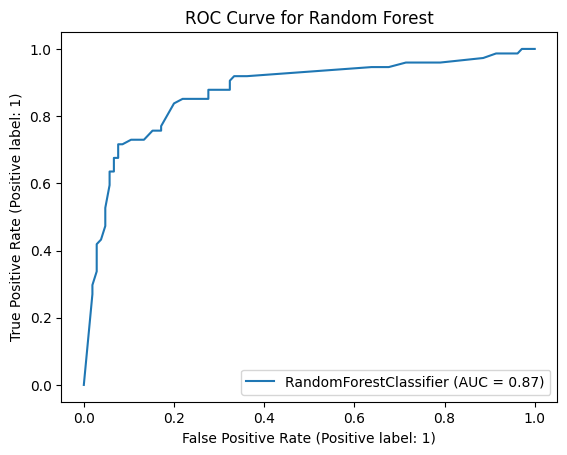

In [47]:
import pandas as pd

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split

from sklearn.metrics import (

    accuracy_score,

    confusion_matrix,

    classification_report,

    roc_auc_score,

    RocCurveDisplay,

)



# Define features and target

X = df_train[['Pclass', 'Sex', 'Embarked', 'Age Group', 'SibSp Group', 'Parch Group']]  # Características (features)

y = df_train['Survived']  # Rótulo (target)



# Split the data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Definir pesos para as classes no Random Forest, penalizando mais os erros na classe minoritária

class_weights = {0: 1, 1: 1}  # Aumenta o peso da classe 1 (sobreviveu)



# Train the Random Forest model

rf = RandomForestClassifier(n_estimators=100, random_state=42,class_weight=class_weights)

rf.fit(X_train, y_train)



# Make predictions

y_pred = rf.predict(X_test)



# Evaluate the model

accuracy = accuracy_score(y_test, y_pred)

conf_matrix = confusion_matrix(y_test, y_pred)

class_report = classification_report(y_test, y_pred)

roc_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])



# Print the evaluation results

print(f'Accuracy: {accuracy:.2f}')

print('Confusion Matrix:')

print(conf_matrix)

print('Classification Report:')

print(class_report)

print(f'ROC AUC Score: {roc_auc:.2f}')



# Optional: Plot ROC Curve

RocCurveDisplay.from_estimator(rf, X_test, y_test)

plt.title('ROC Curve for Random Forest')

plt.show()

In [48]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Configuração de Validação Cruzada

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(rf, X, y, cv=cv, scoring='roc_auc')

# Resultados

print(f'Scores ROC AUC para cada fold: {cv_scores}')

print(f'Média do ROC AUC: {np.mean(cv_scores):.2f}')

print(f'Desvio Padrão do ROC AUC: {np.std(cv_scores):.2f}')

Scores ROC AUC para cada fold: [0.87055336 0.84231283 0.84324866 0.84859626 0.85620263]
Média do ROC AUC: 0.85
Desvio Padrão do ROC AUC: 0.01


## 6. Deploy

### Artefato de transformação

In [49]:
def transform_data(df_to_predict: pd.DataFrame, fill_strategies: dict = None) -> pd.DataFrame:

    """

    Transforma os dados do DataFrame para preparação de modelo preditivo.

    

    - Remove colunas irrelevantes.

    - Converte os tipos de dados.

    - Categoriza variáveis numéricas em grupos.

    - Trata valores ausentes com base em estratégias definidas.

    - Codifica variáveis categóricas.

    

    Parâmetros:

        df_to_predict (pd.DataFrame): DataFrame contendo os dados a serem transformados.

        fill_strategies (dict): Dicionário com estratégias de preenchimento para colunas específicas.

        

    Retorna:

        pd.DataFrame: DataFrame transformado.

    """



    # Estratégias de preenchimento padrão (caso não sejam fornecidas)

    if fill_strategies is None:

        fill_strategies = {

            'Pclass': '3',

            'Embarked': 'S',

            'Sex': 'male',

            'Age': 29,

            'SibSp': 0,

            'Parch': 0,

            'Fare': 14.4542

        }



    # Verificar se as colunas esperadas estão no DataFrame

    expected_columns = {'Name', 'PassengerId', 'Ticket', 'Cabin',

                        'Pclass', 'Embarked', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'}

    missing_columns = expected_columns - set(df_to_predict.columns)

    if missing_columns:

        raise ValueError(f"Colunas ausentes no DataFrame: {missing_columns}")

    

    # Remover colunas irrelevantes

    columns_to_drop = ['Name', 'Ticket', 'Cabin']

    df_to_predict = df_to_predict.drop(columns=columns_to_drop)



    # Converter tipos das variáveis

    type_conversions = {

        'Pclass': 'category',

        'Embarked': 'category',

        'Sex': 'category',

        'Age': int,

        'SibSp': int,

        'Parch': int,

        'Fare': float,

        'PassengerId': str

    }



    # Tratar valores ausentes usando as estratégias definidas

    def fill_missing_values(df, strategies):

        for column, strategy in strategies.items():

            if column in df.columns:

                if strategy == 'median':

                    df[column] = df[column].fillna(df[column].median())

                elif strategy == 'mode':

                    df[column] = df[column].fillna(df[column].mode()[0])

                elif isinstance(strategy, (int, float, str)):

                    df[column] = df[column].fillna(strategy)

                else:

                    raise ValueError(f"Estratégia desconhecida para a coluna {column}: {strategy}")

        return df

    

    df_to_predict = fill_missing_values(df_to_predict, fill_strategies)



    for column, dtype in type_conversions.items():

        df_to_predict[column] = df_to_predict[column].astype(dtype)

    

    # Definir e aplicar bins e labels

    def categorize_column(df, column, bins, labels, new_column_name):

        df[new_column_name] = pd.cut(df[column], bins=bins, labels=labels)

        return df

    

    age_bins = [-1, 12, 19, 39, 64, float('inf')]

    age_labels = ['Criança', 'Adolescente', 'Adulto Jovem', 'Adulto Meia Idade', 'Idoso']

    df_to_predict = categorize_column(df_to_predict, 'Age', age_bins, age_labels, 'Age Group')

    

    sibsp_bins = [-1, 0, 2, float('inf')]

    sibsp_labels = ['Sozinho', 'Família pequena', 'Família grande']

    df_to_predict = categorize_column(df_to_predict, 'SibSp', sibsp_bins, sibsp_labels, 'SibSp Group')

    

    parch_bins = [-1, 0, 1, float('inf')]

    parch_labels = ['Sem filhos', 'Com um filho', 'Com filhos']

    df_to_predict = categorize_column(df_to_predict, 'Parch', parch_bins, parch_labels, 'Parch Group')

    

    # Aplicar LabelEncoder às colunas categóricas

    def encode_categorical_columns(df, columns):

        label_encoder = LabelEncoder()

        for column in columns:

            df[column] = label_encoder.fit_transform(df[column].astype(str))

        return df

    

    categorical_columns = df_to_predict.select_dtypes(include=['category']).columns.tolist()

    df_to_predict = encode_categorical_columns(df_to_predict, categorical_columns)

    

    return df_to_predict


In [50]:
df_test_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [51]:
# Make test prediction

df_to_predict = transform_data(df_test_model)

df_to_predict = df_to_predict[['Pclass', 'Sex', 'Embarked', 'Age Group', 'SibSp Group', 'Parch Group']]  # Características (features)

df_to_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Pclass       418 non-null    int64
 1   Sex          418 non-null    int64
 2   Embarked     418 non-null    int64
 3   Age Group    418 non-null    int64
 4   SibSp Group  418 non-null    int64
 5   Parch Group  418 non-null    int64
dtypes: int64(6)
memory usage: 19.7 KB


In [52]:
# Make predictions

df_test_model['Survived'] = rf.predict(df_to_predict)


In [53]:
df_test_model.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0


In [54]:
df_test_model.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000,418.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188,0.354067
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576,0.478803
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200,0.000000
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000,1.000000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200,1.000000


In [55]:
# Exportando apenas as colunas PassengerId e Survived para Excel

df_test_model[['PassengerId', 'Survived']].to_csv("df_test_model.csv", index=False)

print("Arquivo Excel salvo com sucesso!")


Arquivo Excel salvo com sucesso!
